In [110]:
from typing import Tuple, Dict, Callable, Iterator, Union, Optional, List
import numpy as np
import yaml
import matplotlib.pyplot as plt
import os
import sys
import cloudpickle
import time

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.evaluate import (
    sort_rewards_global_optimization, 
    postprocessing_interpolation_rewards, 
    f_max_new
)

import matplotlib.ticker as ticker

import matplotlib.pyplot as plt


In [111]:
import torch
class cybenko():
    def __init__(self, n_dim = 1):
        self.n_dim = n_dim
        self.n_obj = 2
        self.nadir_point = [1, 1]
       
    def evaluate(self, x):        
        n = x.shape[1]
        
        f1 = 1 - torch.exp(-torch.sum((x - 1 / np.sqrt(n))**2, axis = 1))
        f2 = 1 - torch.exp(-torch.sum((x + 1 / np.sqrt(n))**2, axis = 1))
     
        objs = torch.stack([f1,f2]).T
        
        return objs
    
pb = cybenko()
x = np.linspace(-1, 1, 101)
print(x.shape)
x = torch.from_numpy(x).unsqueeze(1)
truth = pb.evaluate(x).numpy()

(101,)


In [112]:
def postprocess_data(configs: List[str], 
                    experiment_path: int,
                    dim: List[int],
                    name: str="",
                    sort_rewards: bool = True,
                    interpolate: bool = True, 
                    max_new: bool = True):

    method_to_name = {'gibo': 'GIBO'}
    
    for cfg_str in configs:

        with open(cfg_str, 'r') as f:
            cfg = yaml.load(f, Loader=yaml.Loader)

        directory = '.'+ cfg['out_dir']
        # print(cfg['out_dir'])

    fx_dict = {}
    fx_min_dict = {}
    fx_truth_dict = {}
    x_dict = {}
    for d in dim:
        fx_dict[d] = np.load(os.path.join(directory, 'fx_'+str(d)+ name +'.npy'), allow_pickle=True)
        x_dict[d] = np.load(os.path.join(directory, 'x_'+str(d)+ name +'.npy'), allow_pickle=True)

        
    return x_dict, fx_dict

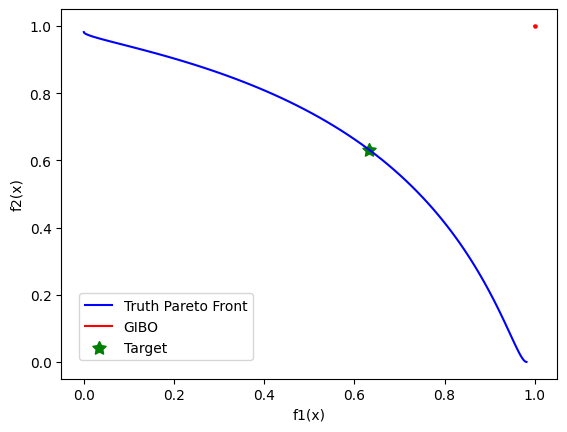

In [113]:
dim = [5, 10]
(x_dict, fx_dict) = postprocess_data(
                            configs=['../configs/toys/gibo_default.yaml'],
                            experiment_path='../experiments/toys/test_experiment/', 
                            dim = dim,
                            name = "")
nadir = 1.0 * torch.ones(10)
f_nadir = pb.evaluate(nadir.unsqueeze(0)).squeeze().numpy()
x = torch.from_numpy(x_dict[10][0])
f_x = pb.evaluate(x).numpy()
plt.xlabel("f1(x)")
plt.ylabel("f2(x)")
plt.plot(truth[:, 0], truth[:, 1], color='blue', label="Truth Pareto Front")
plt.plot(f_x[:, 0], f_x[:, 1], color='red', label="GIBO")
plt.scatter(f_nadir[0], f_nadir[1], facecolor ='red', s = 5)
plt.scatter(truth[50, 0], truth[50, 1], label="Target", facecolor ='green', marker=(5, 1), s = 100)
plt.legend(bbox_to_anchor=(0.40,0.25))
plt.show()